In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [219]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("sa.csv")

df.head()

Saving sa.csv to sa.csv


,X1,X2,Y
0,340,485,0
1,440,399,0
2,216,164,1
3,498,58,0
4,498,12,0


In [220]:
df.shape

(400, 3)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      400 non-null    int64
 1   X2      400 non-null    int64
 2   Y       400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
X_1 = df['X1'].values.tolist()
X_2 = df['X2'].values.tolist()
Y = df['Y'].values.tolist()

In [224]:
X_1 = np.array(X_1)
X_2 = np.array(X_2)
Y = np.array(Y)

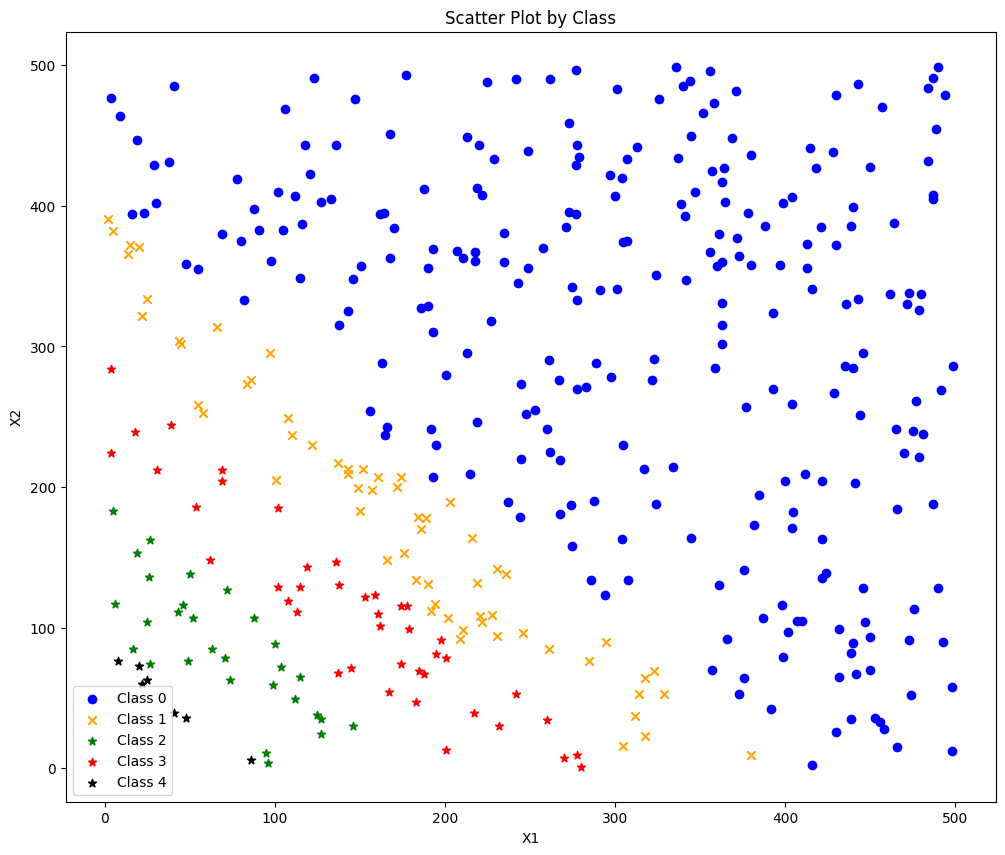

In [225]:
plt.figure(figsize=(12, 10))
plt.scatter(X_1[Y == 0], X_2[Y == 0], label='Class 0', marker='o', color='blue')
plt.scatter(X_1[Y == 1], X_2[Y == 1], label='Class 1', marker='x', color='orange')
plt.scatter(X_1[Y == 2], X_2[Y == 2], label='Class 2', marker='*', color='green')
plt.scatter(X_1[Y == 3], X_2[Y == 3], label='Class 3', marker='*', color='red')
plt.scatter(X_1[Y == 4], X_2[Y == 4], label='Class 4', marker='*', color='black')

#plt.scatter(X_1[Y == 3], X_2[Y == 3], label='Class 3', marker='^', color='green')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot by Class')
plt.legend()
plt.show()

In [226]:
feat = list(zip(X_1, X_2))
feat_np = np.array(feat)

In [227]:
Y_ = []
for i in Y:
  Y_.append(normalize(i, 3))
Y_ = np.array(Y_)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(feat_np, Y_, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (320, 2)
Test set shape: (80, 2)


In [229]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [237]:
import numpy as np

class NN:
    def __init__(self, input_layer_neurons=2,
                 hidden_layer_1_neurons=128,
                 hidden_layer_2_neurons=64,
                 hidden_layer_3_neurons=32,
                 hidden_layer_4_neurons=16,
                 output_layer_neurons=3,
                 learning_rate=0.001,
                 dropout_prob=0.3):

        self.learning_rate = learning_rate
        self.dropout_prob = dropout_prob

        # weights
        self.W_H1I = np.random.randn(input_layer_neurons, hidden_layer_1_neurons) * 0.1
        self.W_H2H1 = np.random.randn(hidden_layer_1_neurons, hidden_layer_2_neurons) * 0.1
        self.W_H3H2 = np.random.randn(hidden_layer_2_neurons, hidden_layer_3_neurons) * 0.1
        self.W_H4H3 = np.random.randn(hidden_layer_3_neurons, hidden_layer_4_neurons) * 0.1
        self.W_OH4  = np.random.randn(hidden_layer_4_neurons, output_layer_neurons) * 0.1

        # biases
        self.biases = [
            np.zeros(hidden_layer_1_neurons),  # b1
            np.zeros(hidden_layer_2_neurons),  # b2
            np.zeros(hidden_layer_3_neurons),  # b3
            np.zeros(hidden_layer_4_neurons),  # b4
            np.zeros(output_layer_neurons)     # b5
        ]

    # dropout function (correct place)
    def dropout(self, X, drop_prob=0.3):
        mask = (np.random.rand(*X.shape) > drop_prob).astype(float)
        return X * mask / (1 - drop_prob)

    # relu for hidden layers
    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    # softmax for output layer
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # forward propagation
    def feedForward(self, X, training=True):
        self.hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.relu(self.hidden1_input)
        if training:  # apply dropout only during training
            self.hidden1_output = self.dropout(self.hidden1_output, self.dropout_prob)

        self.hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.relu(self.hidden2_input)
        if training:
            self.hidden2_output = self.dropout(self.hidden2_output, self.dropout_prob)

        self.hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.relu(self.hidden3_input)
        if training:
            self.hidden3_output = self.dropout(self.hidden3_output, self.dropout_prob)

        self.hidden4_input = np.dot(self.hidden3_output, self.W_H4H3) + self.biases[3]
        self.hidden4_output = self.relu(self.hidden4_input)
        if training:
            self.hidden4_output = self.dropout(self.hidden4_output, self.dropout_prob)

        self.output_input = np.dot(self.hidden4_output, self.W_OH4) + self.biases[4]
        self.output = self.softmax(self.output_input)

        return self.output

    # cross-entropy loss
    def compute_loss(self, Y, pred):
        m = Y.shape[0]
        return -np.sum(Y * np.log(pred + 1e-9)) / m

    # backward propagation
    def backPropagation(self, X, Y, pred):
        m = X.shape[0]

        # output delta
        output_delta = (pred - Y) / m

        # hidden4 delta
        hidden4_error = np.dot(output_delta, self.W_OH4.T)
        hidden4_delta = hidden4_error * self.relu(self.hidden4_output, der=True)

        # hidden3 delta
        hidden3_error = np.dot(hidden4_delta, self.W_H4H3.T)
        hidden3_delta = hidden3_error * self.relu(self.hidden3_output, der=True)

        # hidden2 delta
        hidden2_error = np.dot(hidden3_delta, self.W_H3H2.T)
        hidden2_delta = hidden2_error * self.relu(self.hidden2_output, der=True)

        # hidden1 delta
        hidden1_error = np.dot(hidden2_delta, self.W_H2H1.T)
        hidden1_delta = hidden1_error * self.relu(self.hidden1_output, der=True)

        # update weights
        self.W_OH4 -= self.learning_rate * np.dot(self.hidden4_output.T, output_delta)
        self.W_H4H3 -= self.learning_rate * np.dot(self.hidden3_output.T, hidden4_delta)
        self.W_H3H2 -= self.learning_rate * np.dot(self.hidden2_output.T, hidden3_delta)
        self.W_H2H1 -= self.learning_rate * np.dot(self.hidden1_output.T, hidden2_delta)
        self.W_H1I  -= self.learning_rate * np.dot(X.T, hidden1_delta)

        # update biases
        self.biases[4] -= self.learning_rate * np.sum(output_delta, axis=0)
        self.biases[3] -= self.learning_rate * np.sum(hidden4_delta, axis=0)
        self.biases[2] -= self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[1] -= self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[0] -= self.learning_rate * np.sum(hidden1_delta, axis=0)

    def fit(self, X_train, Y_train, epochs=1000, log_interval=100):
        self.train_loss_history = []
        self.x_axis = []

        for epoch in range(epochs):
            pred_train = self.feedForward(X_train, training=True)
            self.backPropagation(X_train, Y_train, pred_train)

            if epoch % log_interval == 0:
                train_loss = self.compute_loss(Y_train, pred_train)
                self.train_loss_history.append(train_loss)
                self.x_axis.append(epoch)
                print(f"Epoch {epoch}   | Train Loss: {train_loss:.4f}")

    def predict(self, X):
        pred = self.feedForward(X, training=False)  # no dropout in test
        return np.argmax(pred, axis=1)


In [238]:
nn_final = NN(learning_rate=0.005)
nn_final.fit(X_train, y_train, epochs=20000, log_interval=2000)


Epoch 0   | Train Loss: 6.6454
Epoch 2000   | Train Loss: 0.7812
Epoch 4000   | Train Loss: 0.8131
Epoch 6000   | Train Loss: 1.2905
Epoch 8000   | Train Loss: 0.8183
Epoch 10000   | Train Loss: 0.9546
Epoch 12000   | Train Loss: 0.9365
Epoch 14000   | Train Loss: 1.1419
Epoch 16000   | Train Loss: 1.0029
Epoch 18000   | Train Loss: 1.0258


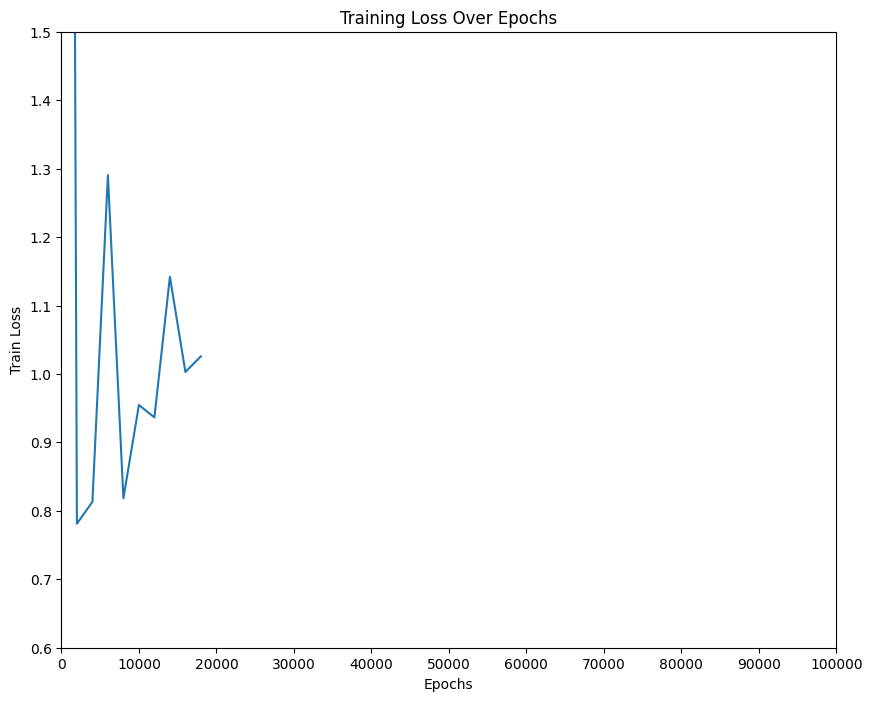

In [239]:
plt.figure(figsize=(10, 8))
plt.plot(nn_final.x_axis, nn_final.train_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Training Loss Over Epochs")
plt.xlim(0, 100000)
plt.ylim(0.6, 1.5)
plt.xticks(range(0, 100001, 10000))
plt.yticks(np.arange(0.6, 1.51, 0.1))
plt.show()

In [240]:
y_pred_test = nn_final.predict(X_test)
y_true_test = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_test == y_true_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.79


In [241]:
def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [243]:
input_data = np.array([[77, 1]])
pred = nn_final.feedForward(input_data)

probabilities = pred[0]
probability_dict = getProb(probabilities)
predicted_class = getClass(probability_dict)

print("Prediction Output:")
print(f"Raw Probabilities: {probabilities}")
print("\nClass Probabilities:")
for class_name, probability in probability_dict.items():
    print(f"  {class_name}: {probability:.2f}%")

print(f"\nPredicted Class: {predicted_class}")

Prediction Output:
Raw Probabilities: [0.93779004 0.00808951 0.05412045]

Class Probabilities:
  Class-0: 93.78%
  Class-1: 0.81%
  Class-2: 5.41%

Predicted Class: Class-0


In [244]:
predictions = nn_final.feedForward(X_test)

y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Total Accuracy: {accuracy:.4f}")

precision = precision_score(y_true_labels, y_pred_labels, average=None, zero_division=0)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score:.4f}")

recall = recall_score(y_true_labels, y_pred_labels, average='macro')
print(f"Recall (macro average): {recall:.4f}")

f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
print(f"F1 Score (macro average): {f1:.4f}")

Total Accuracy: 0.6500
Precision for each class:
Class 0: 0.7612
Class 1: 0.0769
Class 2: 0.0000
Recall (macro average): 0.2976
F1 Score (macro average): 0.2882
